In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [4]:
(X_train, y_train),(X_test, y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 4s 0us/step


In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

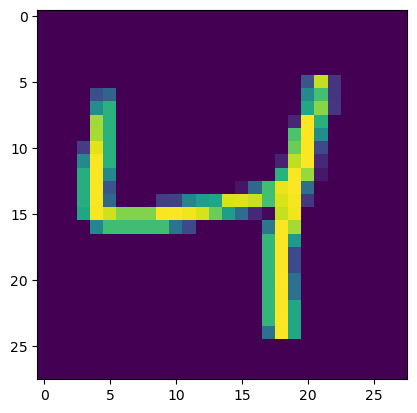

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [52]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25

1500/1500 [==============================] - 4s 2ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.3883 - val_accuracy: 0.9770
Epoch 2/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.4193 - val_accuracy: 0.9760
Epoch 3/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0062 - accuracy: 0.9987 - val_loss: 0.3937 - val_accuracy: 0.9774
Epoch 4/25
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.3894 - val_accuracy: 0.9775
Epoch 5/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 0.3831 - val_accuracy: 0.9772
Epoch 6/25
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.4072 - val_accuracy: 0.9762
Epoch 7/25
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0035 - accuracy: 0.9993 - val_loss: 0.3923 - val_accuracy

In [53]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [54]:
y_pred = y_prob.argmax(axis=1)

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9754

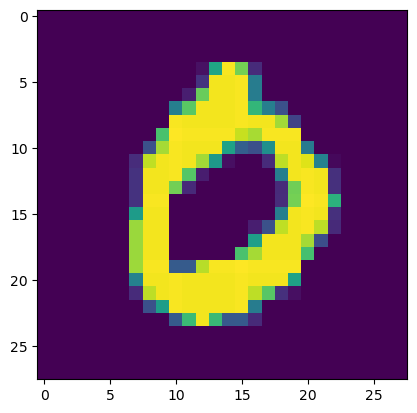

In [63]:
plt.imshow(X_test[3])

In [65]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 21ms/step


array([0], dtype=int64)